# Algoritmo de compresion de imagenes
Basado en : https://rickwierenga.com/blog/machine%20learning/image-compressor-in-Python.html 

K-medias algoritmo


Para esta tarea se tuvo encuenta este algoritmo para comprimir una imagen.


Segun Wikipedia: "K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos."

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
from PIL import Image
from google.colab.patches import cv2_imshow

Empezamos con una funcion que crea puntos inicales para los centroides, toma como entrada los ejemplos de entrenamiento y elige (x, k) puntos al azar. 

In [75]:
def iniciar_k_centroide(x1, k1):
  m = len(x1)
  return x[np.random.choice(m,k1, replace = False),:]

Despues para cada ejemplo de entrenamiento usamos esta funcion para encontrar el centroide mas cercano, tomamos como entrada y como salida el indice del centroide

In [76]:
def buscar_centroide_mascercano(x2,centroide1):
  m2 = len(x2)
  c = np.zeros(m2)
  for i in range(m2):
    distancia = np.linalg.norm(x2[i]- centroide1,axis=1)
    c[i] = np.argmin(distancia)
  return c

en segundo lugar calculamos la distancio de cada ejmplo con su centroide y tomamos el promedio de distancia de cada centroide. Dado que estamos colocando en bucle sobre filas tenemos que transponer los ejemplos

In [77]:
def calcular_medios(x3, idx1, k2):
  q,n = x3.shape
  centroide2 = np.zeros((k2,n))
  for j in range(k2):
    ejemplos = x3[np.where(idx1==j)]
    medio = [np.mean(columna) for columna in ejemplos.T]
    centroide2[j] = medio
  return centroide2

finalmente tenemos todas la variables para completar el algoritmo k-medios, establecemos el nmero maximo de iteraciones teniendo en cuenta que si los centroides ya no se mueven devolvemos los resultados porque no se pude optimiazr mas.

In [83]:
def buscar_k_medios(x4,k3,maxima_iteracion):
  centroide3 = iniciar_k_centroide(x4, k3)
  anterior_centroide = centroide3
  for h in range(maxima_iteracion):
    idx1 = buscar_centroide_mascercano(x4,centroide3)
    centroide3 =  calcular_medios(x4, idx1, k3)
    if (anterior_centroide==centroide3).all():
      return centroide3
    else:
      anterior_centroide = centroide3
  return centroide3, idx1

ahora procedemos a importar una imagen de internet, basta con solo copiar y pegar el link de la imagen. Luego imprimimos el tamaño en bytes de la imagen y la imagen que queremos comprimir. 

Tamaño de la imagen en bytes: 72624


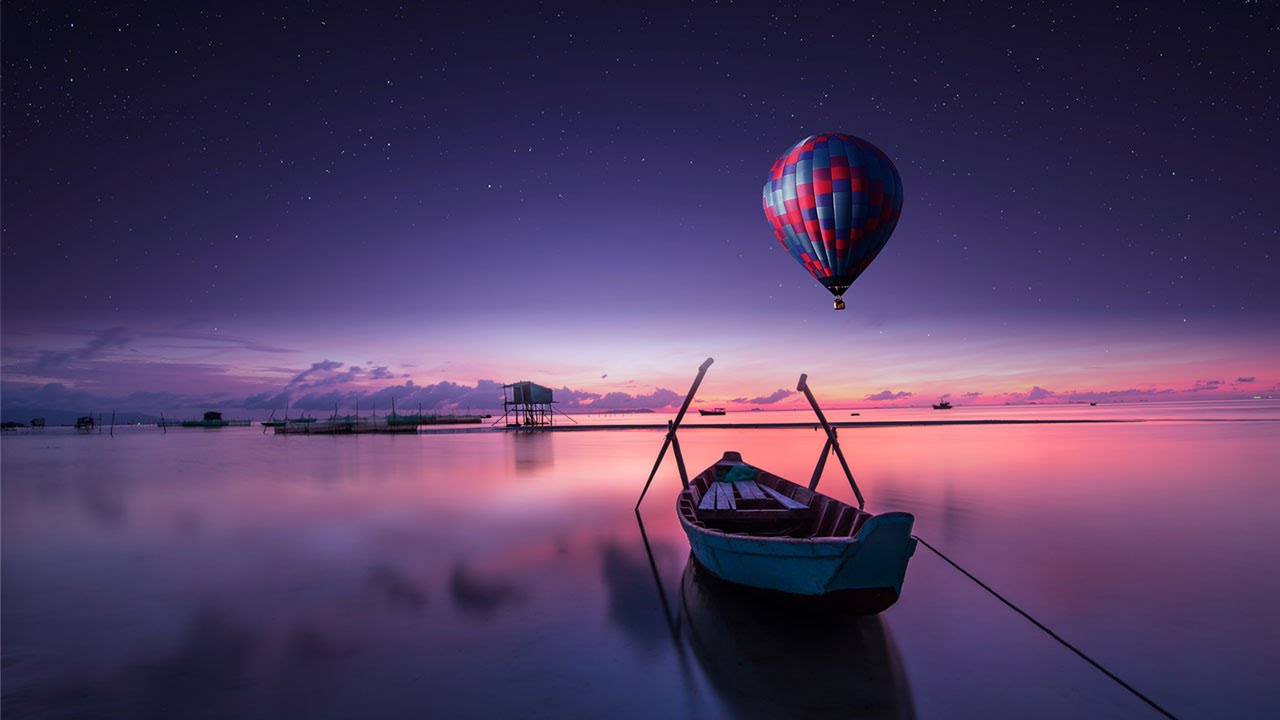

In [79]:
#Importar imagen a comprimir
f = open('sin_compresion.jpg','wb')

#A continuación pegaremos el link de la imagen:
f.write(requests.get('https://i.ytimg.com/vi/n_KrxgXrU4w/maxresdefault.jpg').content)
f.close()
imagen_sin_comprimir = cv2.imread('sin_compresion.jpg')
print('Tamaño de la imagen en bytes:',os.stat('sin_compresion.jpg').st_size)
cv2_imshow(imagen_sin_comprimir)

ahora lo que hacemos es convertir la imagen en un arreglo que contiene cada pixel de la imagen. luego para X obtenemos una matriz de caracteristicas  y K sera la cantidad de colores en la imagen comprimida.
**Colores** seran los colores obtenidos con la funcion **Buscar_k_medio**.
despues se llaman el resto de funciones y por ultimo se recompone la imagen con formato **jpg**.

In [84]:
#comvertir imagen en una lista de pixeles
img = Image.open('sin_compresion.jpg')
Pixeles = np.asarray(img)/255
ancho, alto, profundidad = Pixeles.shape
x = Pixeles.reshape((ancho*alto,profundidad))
k = 10 #entre mas pequeño este numero mas se comprime la imagen
colores, w = buscar_k_medios(x, k, maxima_iteracion=10)#maxima_iteracion tambien se puede disminuir este numero para comprirmir mas la imagen
idx = buscar_centroide_mascercano(x,colores)
idx = np.array(idx,dtype=np.uint8)
Pixeles_comprimido = np.array(colores[idx,:]*255,dtype=np.uint8).reshape((ancho, alto, profundidad))
Imagen_comprimida = Image.fromarray(Pixeles_comprimido)
Imagen_comprimida.save('Comprimida.jpg')

Por ultimo imprimimos el tamaña de imagen resultante y la imagen.

Tamaño de la imagen en bytes: 60820


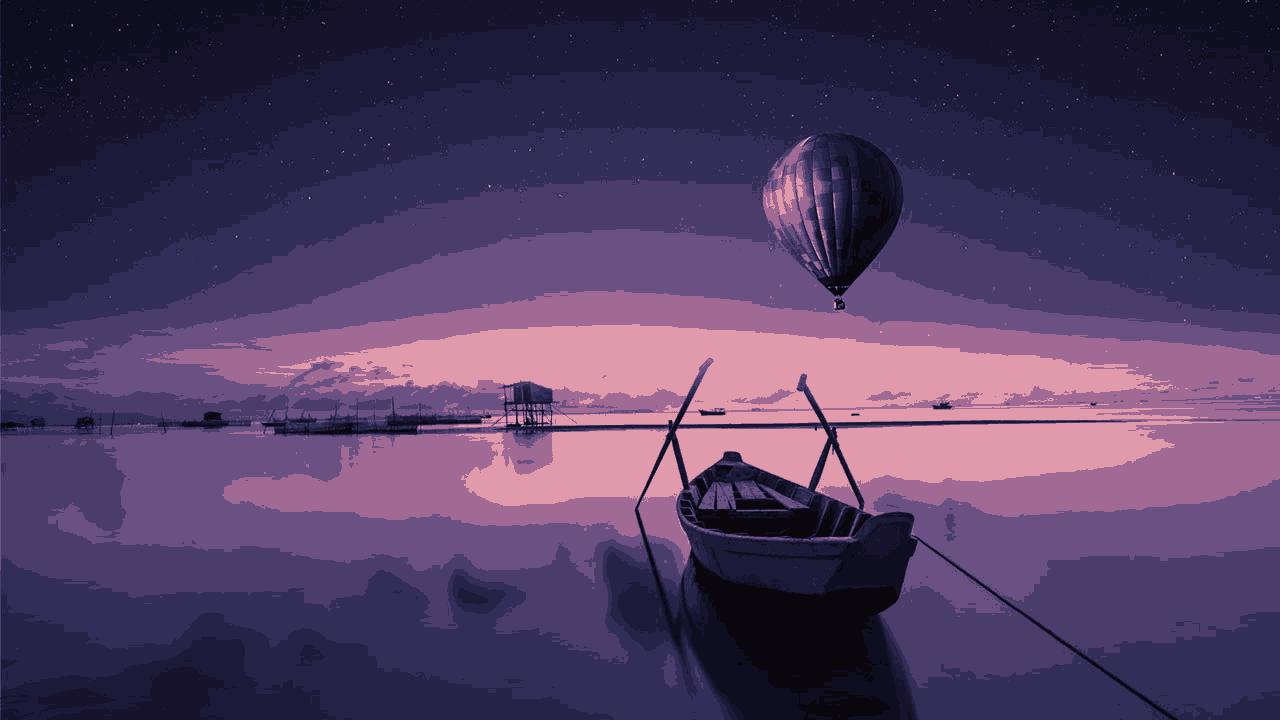

In [85]:
imagen_com = cv2.imread('Comprimida.jpg')
print('Tamaño de la imagen en bytes:',os.stat('Comprimida.jpg').st_size)
cv2_imshow(imagen_com)

Acapodemos ver el porecentaje de compresion con **K**=10 y **Maxima_iteracion** =10 con estos dos valores podemos jugar para conseguir mas, o menos compresion(cifras grandes dan porcentajes mas altos)

In [86]:
Tamaño_original = os.stat('sin_compresion.jpg').st_size
Tamaño_comprimido = os.stat('Comprimida.jpg').st_size
porcentaje_de_compresion = (Tamaño_comprimido*100)/Tamaño_original
print('Procentaje de compresion:{}%'.format(round(porcentaje_de_compresion,2)))

Procentaje de compresion:83.75%
